In [ ]:
import numpy as np
import pandas as pd
import sklearn

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/NIT_dataset.csv")
df.sample(5)

,count,SrcBytes,DstBytes,SrcLoad,DstLoad,SIntPkt,DIntPkt,SIntPktAct,SrcJitter,DstJitter,...,SpO2,Pulse_Rate,SYS,DIA,Heart_rate,Resp_Rate,ST,Flgs_n,SrcMac_n,Label_n
12140,12140,496,186,248518.0,82839.0,3.991667,2.3190,0.0,3.026329,2.2210,...,98,73,148,84,73,19,0.30,4,0,0
9096,9096,496,186,46373.0,15458.0,21.391666,2.2935,0.0,27.152627,2.2605,...,99,72,142,72,71,26,0.36,4,0,0
6390,6390,496,186,221363.0,73788.0,4.481333,2.7040,0.0,3.381047,2.6590,...,98,73,138,83,69,18,0.22,4,0,0
9894,9894,496,186,38669.0,12890.0,25.653666,2.4195,0.0,32.996832,2.4015,...,99,72,142,72,71,26,0.36,4,0,0
2956,2956,496,186,204396.0,68132.0,4.853333,2.7630,0.0,3.753754,2.6960,...,97,79,145,87,82,23,0.08,4,0,0


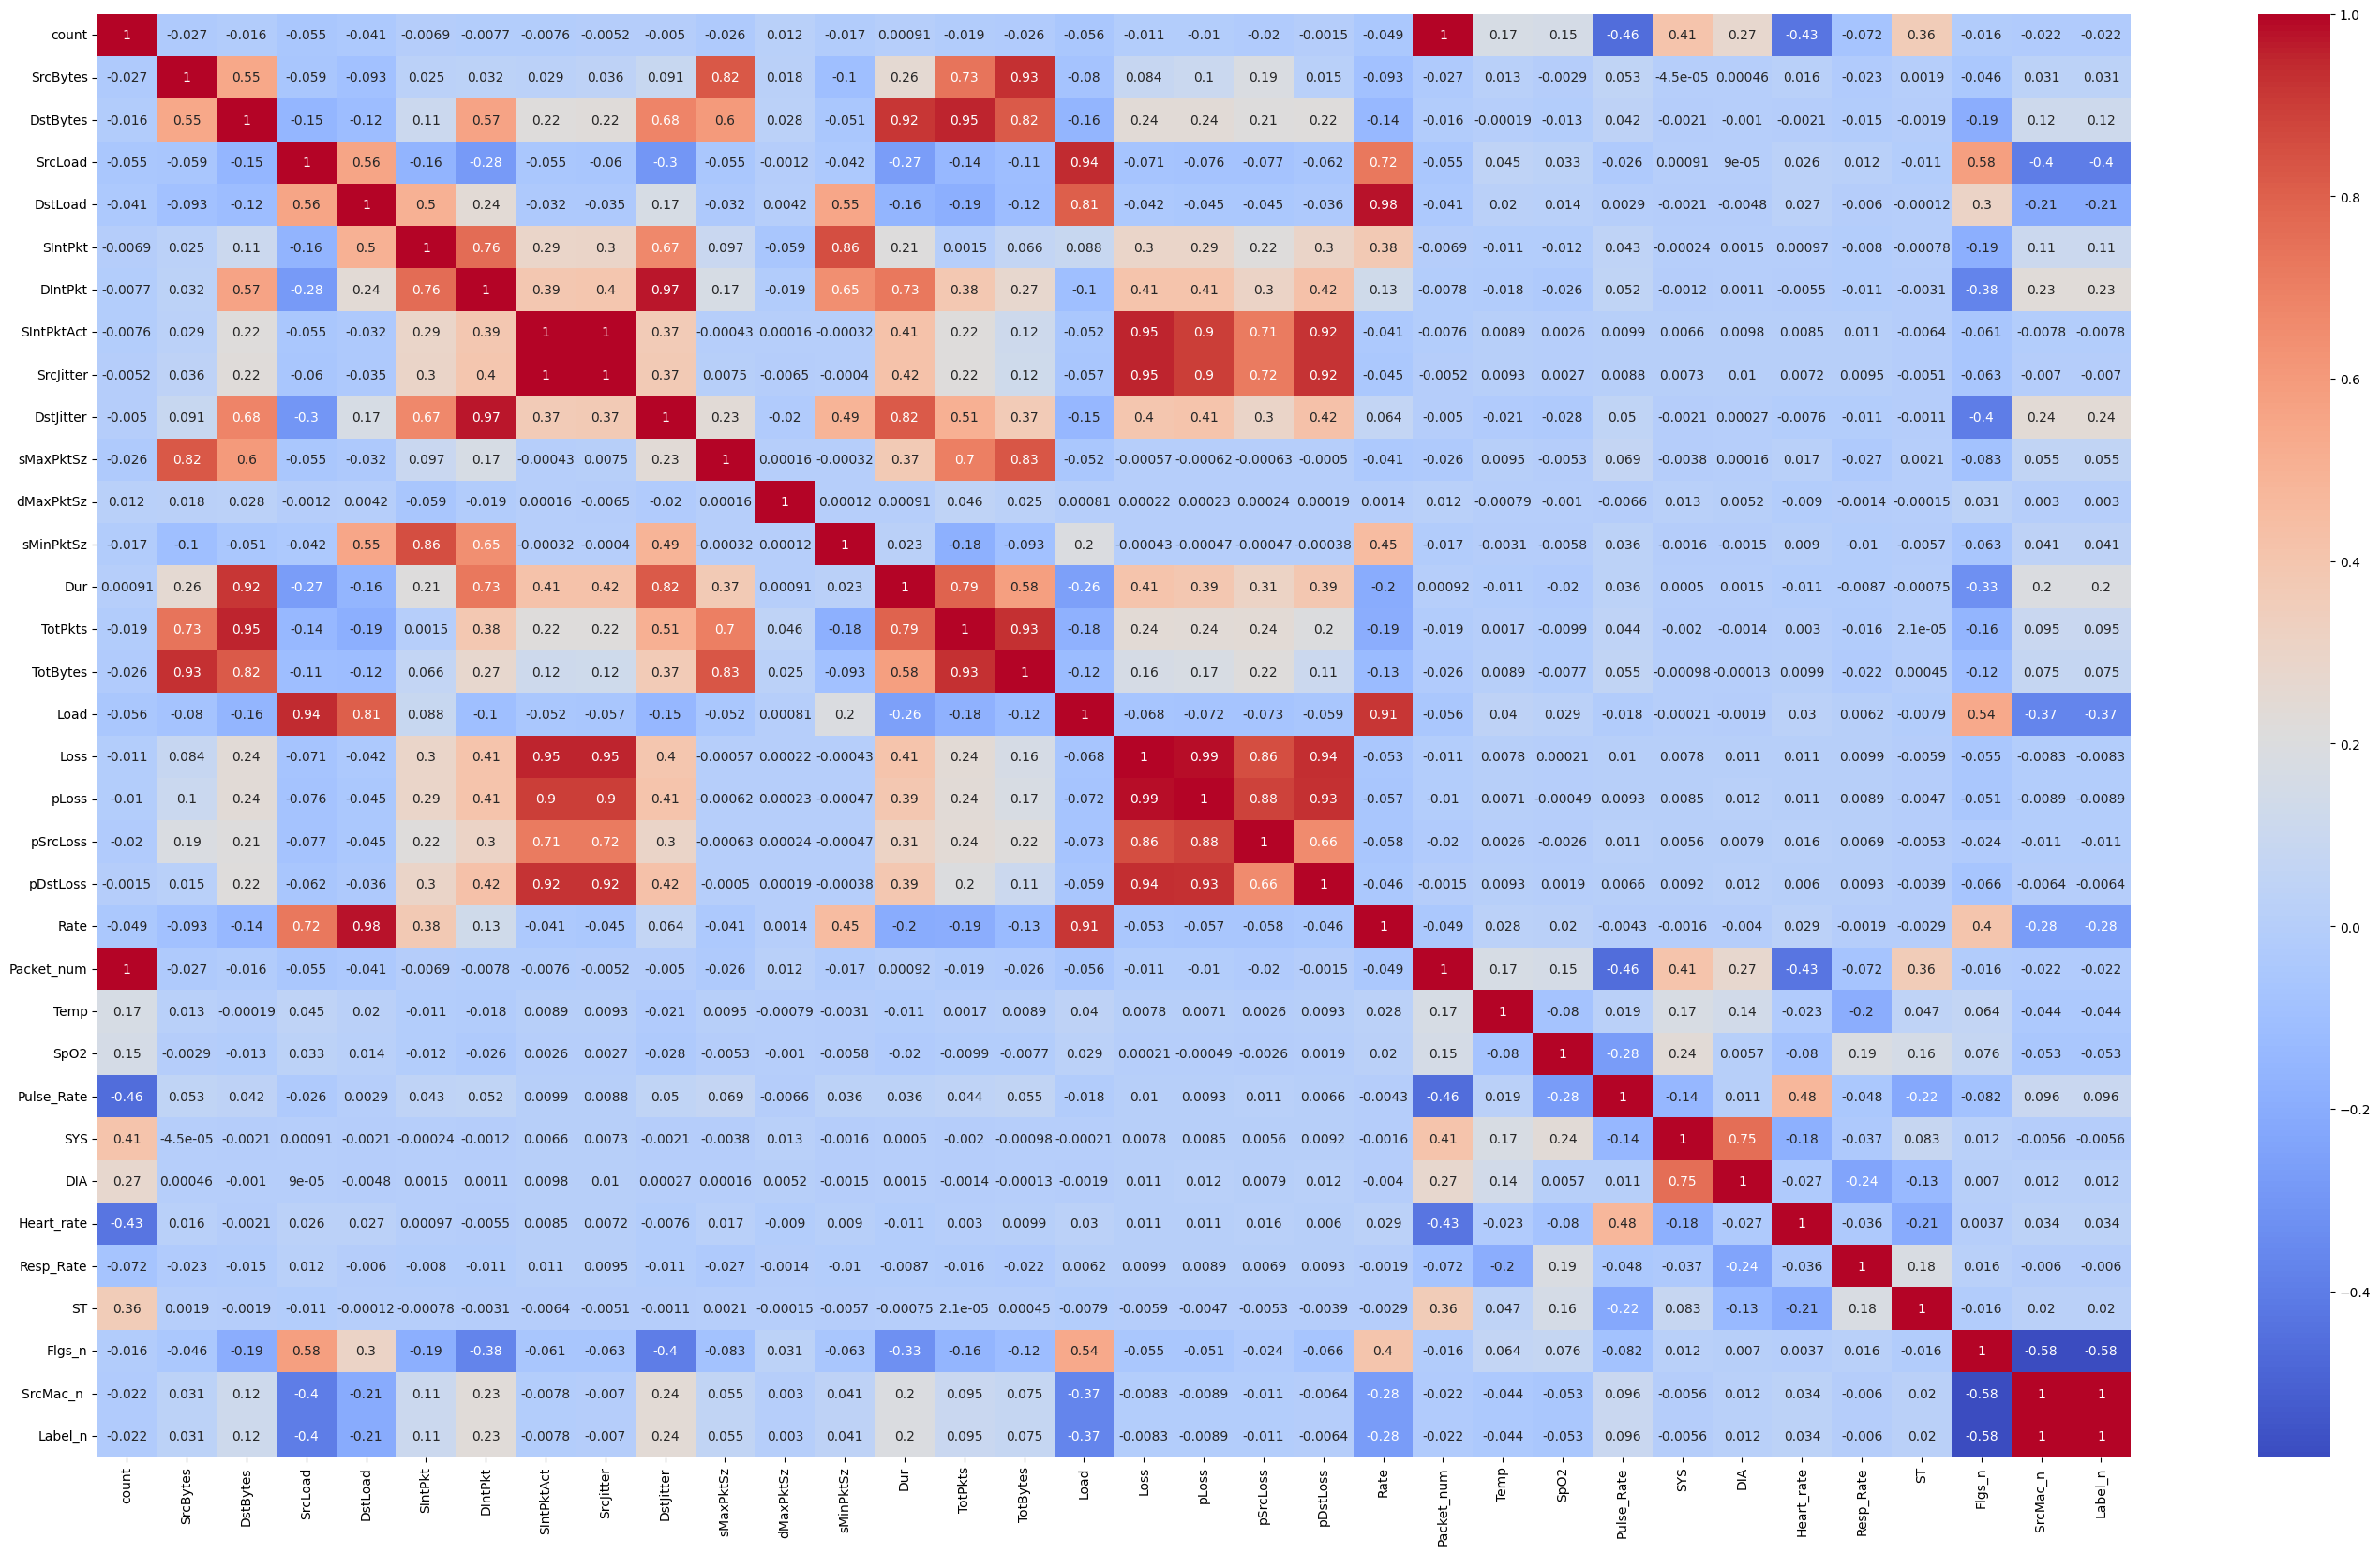

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr_matrix = df.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(35, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
X=df.drop("Label_n",axis=1)
y=df["Label_n"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 3: Train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=80, random_state=32)
rf.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = rf.predict(X_test)

# Step 5: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2848
           1       1.00      1.00      1.00       416

    accuracy                           1.00      3264
   macro avg       1.00      1.00      1.00      3264
weighted avg       1.00      1.00      1.00      3264



In [ ]:
rf.score(X_test,y_test)

1.0

In [ ]:
# Hide Warnings

import warnings
warnings.filterwarnings('ignore') #Set it to default to receive warnings again

In [ ]:
import time
from statistics import mean
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss,matthews_corrcoef,auc, accuracy_score, recall_score, confusion_matrix, precision_score, f1_score, mean_squared_error, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
%matplotlib inline
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import VotingClassifier

import xgboost as xgb
from xgboost import XGBClassifier

import lightgbm as lgb
from lightgbm import LGBMClassifier

In [ ]:
# Using Logistic Regression

scores_train = []
scores_test = []
time_taken = []
precision_train = []
precision_test = []
recall_train = []
recall_test = []
f1_train = []
f1_test = []
MCC_test=[]
Log_test=[]

for i in range(3):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.333)

    start_time = time.time()
    model = LogisticRegression()
    model.fit(x_train, y_train)
    taken = time.time() - start_time
    time_taken.append(taken)

    y_pred_train = model.predict(x_train)
    score = accuracy_score(y_pred_train, y_train)
    scores_train.append(score)

    y_pred = model.predict(x_test)
    score = accuracy_score(y_pred, y_test)
    scores_test.append(score)

    score = precision_score(y_test, y_pred)
    precision_test.append(score)

    score = precision_score(y_train, y_pred_train)
    precision_train.append(score)

    score = recall_score(y_test, y_pred)
    recall_test.append(score)

    score = recall_score(y_train, y_pred_train)
    recall_train.append(score)

    score = f1_score(y_test, y_pred)
    f1_test.append(score)

    score = f1_score(y_train, y_pred_train)
    f1_train.append(score)

    score = matthews_corrcoef(y_test, y_pred)
    MCC_test.append(score)

    score = log_loss(y_test, y_pred)
    Log_test.append(score)

print("Average time taken is", mean(time_taken), "secs")
print("Average training data accuracy:",mean(scores_train)*100,)
print("Average test data accuracy:",mean(scores_test)*100)
print("Average training data precision:",mean(precision_train)*100,)
print("Average test data precision:",mean(precision_test)*100)
print("Average training data recall:",mean(recall_train)*100,)
print("Average test data recall:",mean(recall_test)*100)
print("Average training data f1 score:",mean(f1_train)*100,)
print("Average test data f1 score:",mean(f1_test)*100)
print("Average test data MCC:",mean(MCC_test)*100)
print("Average test data Log_loss:",mean(Log_test)*100)

Average time taken is 0.2102487881978353 secs
Average training data accuracy: 92.86720568418474
Average test data accuracy: 92.70641639062691
Average training data precision: 95.1483986696808
Average test data precision: 96.15473796285342
Average training data recall: 45.29964629203997
Average test data recall: 43.86179194678806
Average training data f1 score: 61.36626176769035
Average test data f1 score: 60.235506199744236
Average test data MCC: 62.17287656351645
Average test data Log_loss: 262.88739958078946


In [ ]:
# Using SVM

scores_train = []
scores_test = []
time_taken = []
precision_train = []
precision_test = []
recall_train = []
recall_test = []
f1_train = []
f1_test = []

for i in range(3):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.333)

    start_time = time.time()
    model = make_pipeline(StandardScaler(), LinearSVC(tol=1e-5))
    model.fit(x_train, y_train)
    taken = time.time() - start_time
    time_taken.append(taken)

    y_pred_train = model.predict(x_train)
    score = accuracy_score(y_pred_train, y_train)
    scores_train.append(score)

    y_pred = model.predict(x_test)
    score = accuracy_score(y_pred, y_test)
    scores_test.append(score)

    score = precision_score(y_test, y_pred)
    precision_test.append(score)

    score = precision_score(y_train, y_pred_train)
    precision_train.append(score)

    score = recall_score(y_test, y_pred)
    recall_test.append(score)

    score = recall_score(y_train, y_pred_train)
    recall_train.append(score)

    score = f1_score(y_test, y_pred)
    f1_test.append(score)

    score = f1_score(y_train, y_pred_train)
    f1_train.append(score)

    score = matthews_corrcoef(y_test, y_pred)
    MCC_test.append(score)

    score = log_loss(y_test, y_pred)
    Log_test.append(score)


print("Average time taken is", mean(time_taken), "secs")
print("Average training data accuracy:",mean(scores_train)*100,)
print("Average test data accuracy:",mean(scores_test)*100)
print("Average training data precision:",mean(precision_train)*100,)
print("Average test data precision:",mean(precision_test)*100)
print("Average training data recall:",mean(recall_train)*100,)
print("Average test data recall:",mean(recall_test)*100)
print("Average training data f1 score:",mean(f1_train)*100,)
print("Average test data f1 score:",mean(f1_test)*100)
print("Average test data MCC:",mean(MCC_test)*100)
print("Average test data Log_loss:",mean(Log_test)*100)

Average time taken is 7.112725893656413 secs
Average training data accuracy: 100.0
Average test data accuracy: 100.0
Average training data precision: 100.0
Average test data precision: 100.0
Average training data recall: 100.0
Average test data recall: 100.0
Average training data f1 score: 100.0
Average test data f1 score: 100.0
Average test data MCC: 81.08643828175823
Average test data Log_loss: 131.44369979039473


In [ ]:
# Using Naive Bayes

scores_train = []
scores_test = []
time_taken = []
precision_train = []
precision_test = []
recall_train = []
recall_test = []
f1_train = []
f1_test = []

for i in range(3):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.333)

    start_time = time.time()
    model = GaussianNB()
    model.fit(x_train, y_train)
    taken = time.time() - start_time
    time_taken.append(taken)

    y_pred_train = model.predict(x_train)
    score = accuracy_score(y_pred_train, y_train)
    scores_train.append(score)

    y_pred = model.predict(x_test)
    score = accuracy_score(y_pred, y_test)
    scores_test.append(score)

    score = precision_score(y_test, y_pred)
    precision_test.append(score)

    score = precision_score(y_train, y_pred_train)
    precision_train.append(score)

    score = recall_score(y_test, y_pred)
    recall_test.append(score)

    score = recall_score(y_train, y_pred_train)
    recall_train.append(score)

    score = f1_score(y_test, y_pred)
    f1_test.append(score)

    score = f1_score(y_train, y_pred_train)
    f1_train.append(score)

    score = matthews_corrcoef(y_test, y_pred)
    MCC_test.append(score)

    score = log_loss(y_test, y_pred)
    Log_test.append(score)

print("Average time taken is", mean(time_taken), "secs")
print("Average training data accuracy:",mean(scores_train)*100,)
print("Average test data accuracy:",mean(scores_test)*100)
print("Average training data precision:",mean(precision_train)*100,)
print("Average test data precision:",mean(precision_test)*100)
print("Average training data recall:",mean(recall_train)*100,)
print("Average test data recall:",mean(recall_test)*100)
print("Average training data f1 score:",mean(f1_train)*100,)
print("Average test data f1 score:",mean(f1_test)*100)
print("Average test data MCC:",mean(MCC_test)*100)
print("Average test data Log_loss:",mean(Log_test)*100)

Average time taken is 0.0121610959370931 secs
Average training data accuracy: 89.0512066642166
Average test data accuracy: 89.40620782726046
Average training data precision: 58.918801794158796
Average test data precision: 59.371116526309045
Average training data recall: 45.80200167886051
Average test data recall: 46.431584791889165
Average training data f1 score: 51.4420091469838
Average test data f1 score: 52.04346680979408
Average test data MCC: 69.61372199657755
Average test data Log_loss: 214.90879091045196


In [ ]:
# Using Random Forest

scores_train = []
scores_test = []
time_taken = []
precision_train = []
precision_test = []
recall_train = []
recall_test = []
f1_train = []
f1_test = []

for i in range(3):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.333)

    start_time = time.time()

    rf_model = RandomForestClassifier()
    rf_model.fit(x_train, y_train)

    taken = time.time() - start_time
    time_taken.append(taken)

    y_pred_train = rf_model.predict(x_train)
    score = accuracy_score(y_pred_train, y_train)
    scores_train.append(score)


    y_pred = rf_model.predict(x_test)
    score = accuracy_score(y_pred, y_test)
    scores_test.append(score)

    score = precision_score(y_test, y_pred)
    precision_test.append(score)

    score = precision_score(y_train, y_pred_train)
    precision_train.append(score)

    score = recall_score(y_test, y_pred)
    recall_test.append(score)

    score = recall_score(y_train, y_pred_train)
    recall_train.append(score)

    score = f1_score(y_test, y_pred)
    f1_test.append(score)

    score = f1_score(y_train, y_pred_train)
    f1_train.append(score)

    score = matthews_corrcoef(y_test, y_pred)
    MCC_test.append(score)

    score = log_loss(y_test, y_pred)
    Log_test.append(score)

print("Average time taken is", mean(time_taken), "secs")
print("Average training data accuracy:",mean(scores_train)*100,)
print("Average test data accuracy:",mean(scores_test)*100)
print("Average training data precision:",mean(precision_train)*100,)
print("Average test data precision:",mean(precision_test)*100)
print("Average training data recall:",mean(recall_train)*100,)
print("Average test data recall:",mean(recall_test)*100)
print("Average training data f1 score:",mean(f1_train)*100,)
print("Average test data f1 score:",mean(f1_test)*100)
print("Average test data MCC:",mean(MCC_test)*100)
print("Average test data Log_loss:",mean(Log_test)*100)

Average time taken is 2.9202946027119956 secs
Average training data accuracy: 100.0
Average test data accuracy: 100.0
Average training data precision: 100.0
Average test data precision: 100.0
Average training data recall: 100.0
Average test data recall: 100.0
Average training data f1 score: 100.0
Average test data f1 score: 100.0
Average test data MCC: 77.21029149743316
Average test data Log_loss: 161.18159318283895


In [ ]:
# Using Weighted-Average Bagging

scores_train = []
scores_test = []
time_taken = []
precision_train = []
precision_test = []
recall_train = []
recall_test = []
f1_train = []
f1_test = []

for i in range(3):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.333)

    start_time = time.time()

    models = list()
    models.append(('lr', LogisticRegression()))
    models.append(('cart', DecisionTreeClassifier()))
    models.append(('bayes', GaussianNB()))

    scores = list()
    for name, model in models:
        model.fit(x_train, y_train)
        yhat = model.predict(x_test)
        acc = accuracy_score(y_test, yhat)
        scores.append(acc)

    ensemble = VotingClassifier(estimators=models, voting='soft', weights=scores)
    ensemble.fit(x_train, y_train)

    taken = time.time() - start_time
    time_taken.append(taken)


    y_pred_train = ensemble.predict(x_train)
    score = accuracy_score(y_pred_train, y_train)
    scores_train.append(score)

    y_pred = ensemble.predict(x_test)
    score = accuracy_score(y_pred, y_test)
    scores_test.append(score)

    score = precision_score(y_test, y_pred)
    precision_test.append(score)

    score = precision_score(y_train, y_pred_train)
    precision_train.append(score)

    score = recall_score(y_test, y_pred)
    recall_test.append(score)

    score = recall_score(y_train, y_pred_train)
    recall_train.append(score)

    score = f1_score(y_test, y_pred)
    f1_test.append(score)

    score = f1_score(y_train, y_pred_train)
    f1_train.append(score)

    score = matthews_corrcoef(y_test, y_pred)
    MCC_test.append(score)

    score = log_loss(y_test, y_pred)
    Log_test.append(score)
print("Average time taken is", mean(time_taken), "secs")
print("Average training data accuracy:",mean(scores_train)*100,)
print("Average test data accuracy:",mean(scores_test)*100)
print("Average training data precision:",mean(precision_train)*100,)
print("Average test data precision:",mean(precision_test)*100)
print("Average training data recall:",mean(recall_train)*100,)
print("Average test data recall:",mean(recall_test)*100)
print("Average training data f1 score:",mean(f1_train)*100,)
print("Average test data f1 score:",mean(f1_test)*100)
print("Average test data MCC:",mean(MCC_test)*100)
print("Average test data Log_loss:",mean(Log_test)*100)

Average time taken is 2.0449582735697427 secs
Average training data accuracy: 93.04177385765038
Average test data accuracy: 93.02539565697461
Average training data precision: 96.79717758195147
Average test data precision: 95.09264273098036
Average training data recall: 45.575876313783134
Average test data recall: 47.66275873312008
Average training data f1 score: 61.96538747962125
Average test data f1 score: 63.46346264360074
Average test data MCC: 74.66702009735849
Average test data Log_loss: 179.22331883951887


In [ ]:
# Using XGBoost

scores_train = []
scores_test = []
time_taken = []
precision_train = []
precision_test = []
recall_train = []
recall_test = []
f1_train = []
f1_test = []

for i in range(3):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.333)

    start_time = time.time()
    from xgboost import XGBClassifier
    params = {
                'objective':'binary:logistic',
                'max_depth': 4,
                'alpha': 10,
                'learning_rate': 1.0,
                'n_estimators':100
             }
    xgb_clf = XGBClassifier()
    xgb_clf.fit(x_train, y_train)
    taken = time.time() - start_time

    time_taken.append(taken)


    y_pred_train = xgb_clf.predict(x_train)
    score = accuracy_score(y_pred_train, y_train)
    scores_train.append(score)

    y_pred = xgb_clf.predict(x_test)
    score = accuracy_score(y_pred, y_test)
    scores_test.append(score)

    score = precision_score(y_test, y_pred)
    precision_test.append(score)

    score = precision_score(y_train, y_pred_train)
    precision_train.append(score)

    score = recall_score(y_test, y_pred)
    recall_test.append(score)

    score = recall_score(y_train, y_pred_train)
    recall_train.append(score)

    score = f1_score(y_test, y_pred)
    f1_test.append(score)

    score = f1_score(y_train, y_pred_train)
    f1_train.append(score)

    score = matthews_corrcoef(y_test, y_pred)
    MCC_test.append(score)

    score = log_loss(y_test, y_pred)
    Log_test.append(score)
print("Average time taken is", mean(time_taken), "secs")
print("Average training data accuracy:",mean(scores_train)*100,)
print("Average test data accuracy:",mean(scores_test)*100)
print("Average training data precision:",mean(precision_train)*100,)
print("Average test data precision:",mean(precision_test)*100)
print("Average training data recall:",mean(recall_train)*100,)
print("Average test data recall:",mean(recall_test)*100)
print("Average training data f1 score:",mean(f1_train)*100,)
print("Average test data f1 score:",mean(f1_test)*100)
print("Average test data MCC:",mean(MCC_test)*100)
print("Average test data Log_loss:",mean(Log_test)*100)

Average time taken is 1.9786745707194011 secs
Average training data accuracy: 100.0
Average test data accuracy: 100.0
Average training data precision: 100.0
Average test data precision: 100.0
Average training data recall: 100.0
Average test data recall: 100.0
Average training data f1 score: 100.0
Average test data f1 score: 100.0
Average test data MCC: 84.16688756084905
Average test data Log_loss: 112.0145742746993


In [ ]:
# Using LightGBM

scores_train = []
scores_test = []
time_taken = []
precision_train = []
precision_test = []
recall_train = []
recall_test = []
f1_train = []
f1_test = []

for i in range(3):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.333)

    start_time = time.time()
    model = lgb.LGBMClassifier()
    model.fit(x_train, y_train)
    taken = time.time() - start_time

    time_taken.append(taken)

    y_pred_train = model.predict(x_train)
    score = accuracy_score(y_pred_train, y_train)
    scores_train.append(score)

    y_pred = model.predict(x_test)
    score = accuracy_score(y_pred, y_test)
    scores_test.append(score)

    score = precision_score(y_test, y_pred)
    precision_test.append(score)

    score = precision_score(y_train, y_pred_train)
    precision_train.append(score)

    score = recall_score(y_test, y_pred)
    recall_test.append(score)

    score = recall_score(y_train, y_pred_train)
    recall_train.append(score)

    score = f1_score(y_test, y_pred)
    f1_test.append(score)

    score = f1_score(y_train, y_pred_train)
    f1_train.append(score)

    score = matthews_corrcoef(y_test, y_pred)
    MCC_test.append(score)

    score = log_loss(y_test, y_pred)
    Log_test.append(score)

print("Average time taken is", mean(time_taken), "secs")
print("Average training data accuracy:",mean(scores_train)*100,)
print("Average test data accuracy:",mean(scores_test)*100)
print("Average training data precision:",mean(precision_train)*100,)
print("Average test data precision:",mean(precision_test)*100)
print("Average training data recall:",mean(recall_train)*100,)
print("Average test data recall:",mean(recall_test)*100)
print("Average training data f1 score:",mean(f1_train)*100,)
print("Average test data f1 score:",mean(f1_test)*100)
print("Average test data MCC:",mean(MCC_test)*100)
print("Average test data Log_loss:",mean(Log_test)*100)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1376, number of negative: 9508
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005118 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3150
[LightGBM] [Info] Number of data points in the train set: 10884, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126424 -> initscore=-1.932953
[LightGBM] [Info] Start training from score -1.932953
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

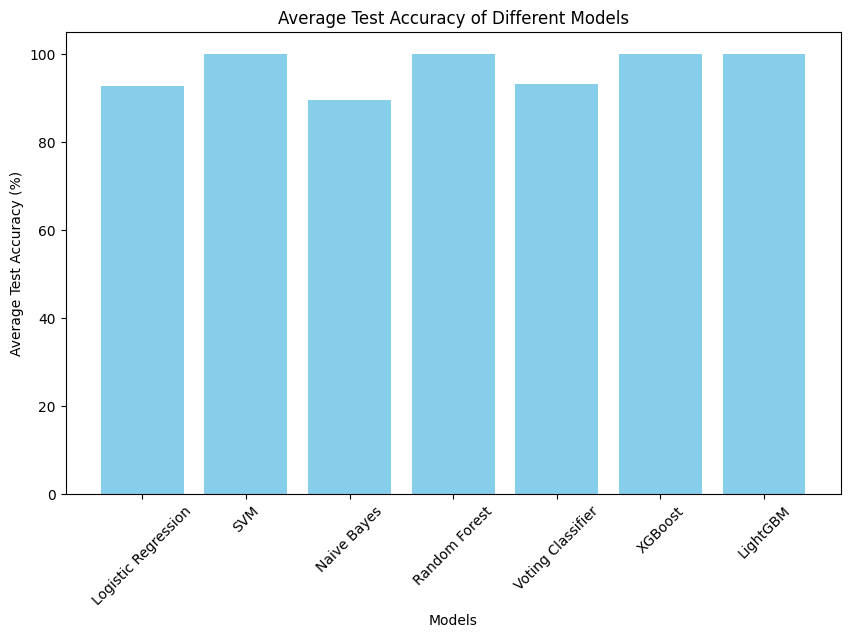

In [ ]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'SVM', 'Naive Bayes', 'Random Forest', 'Voting Classifier', 'XGBoost', 'LightGBM']
average_test_accuracy = [92.71, 100.0, 89.41, 100.0, 93.03, 100.0, 100.0]

plt.figure(figsize=(10, 6))
plt.bar(models, average_test_accuracy, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Average Test Accuracy (%)')
plt.title('Average Test Accuracy of Different Models')
plt.xticks(rotation=45)
plt.show()
